# **INCOME SPENT CLUSTERING Using K Means**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

**---- INITIAL DATA ANALYSIS ----**

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [4]:
dataset.tail()

,INCOME,SPEND
298,241,123
299,264,132
300,193,141
301,131,115
302,236,174


In [5]:
dataset.shape

(303, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [7]:
dataset.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


**VISUALIZING the data**

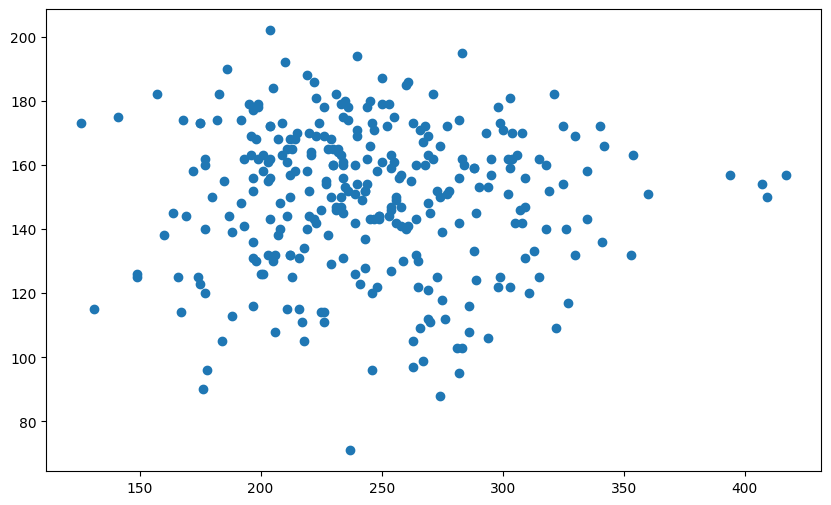

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(dataset['INCOME'], dataset['SPEND'])
plt.show()

**Combining the data into X for clustering**

In [23]:
X = dataset[['INCOME', 'SPEND']]

**Finding Optimal K-Value**

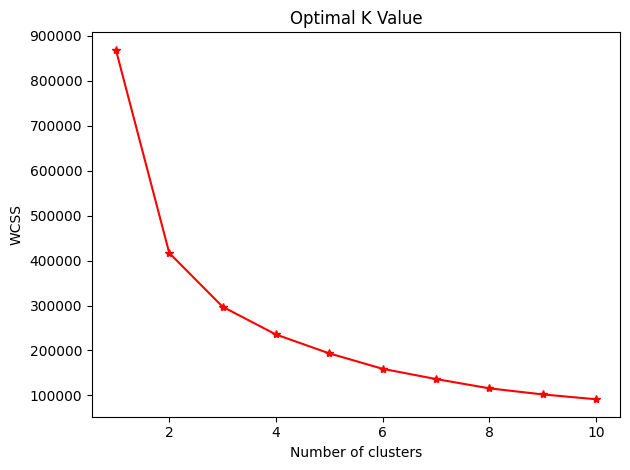

In [30]:
WCSS = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=82)
    km.fit(X)
    WCSS.append(km.inertia_)

plt.plot(range(1,11), WCSS, color='red', marker='*')
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()
    

**Initializing the model and training it**

In [54]:
model = KMeans(n_clusters=4, random_state=45)
labels = model.fit_predict(X)

In [55]:
print(labels)

[3 3 1 3 2 1 2 3 1 1 3 0 3 1 2 3 2 0 3 3 3 3 3 0 1 2 1 1 2 1 1 1 3 0 1 1 2
 3 0 2 2 3 1 0 2 2 3 3 1 3 3 2 3 1 3 1 3 3 1 2 0 2 1 1 1 1 3 3 3 1 3 3 3 3
 1 3 3 3 1 3 3 2 2 2 0 3 0 1 1 0 3 1 3 2 1 0 2 3 2 3 3 0 1 3 1 1 0 3 3 3 2
 1 2 1 3 3 3 1 1 3 2 3 3 3 1 3 1 3 1 0 1 3 2 3 2 3 1 1 1 0 2 2 1 3 1 3 3 3
 3 1 3 1 3 0 3 1 3 1 1 3 3 2 1 1 1 0 0 3 3 1 0 3 2 3 1 1 3 2 1 0 2 0 2 3 0
 2 3 0 3 1 2 1 1 0 1 2 3 3 0 3 1 0 0 0 1 3 3 3 1 1 3 0 1 2 3 2 0 2 0 3 2 1
 3 0 0 1 0 1 2 2 3 0 0 0 2 2 2 2 2 0 0 3 1 0 1 3 2 0 3 3 0 3 0 0 0 2 0 1 3
 3 3 3 0 3 1 1 2 1 0 0 3 3 0 3 0 1 1 0 2 1 2 1 1 3 1 2 1 3 2 1 1 2 3 1 1 1
 1 1 0 0 1 1 3]


**Finding Clusters and Centroids for the data**

In [56]:
labels = model.labels_
centers = model.cluster_centers_

In [57]:
print(labels)

[3 3 1 3 2 1 2 3 1 1 3 0 3 1 2 3 2 0 3 3 3 3 3 0 1 2 1 1 2 1 1 1 3 0 1 1 2
 3 0 2 2 3 1 0 2 2 3 3 1 3 3 2 3 1 3 1 3 3 1 2 0 2 1 1 1 1 3 3 3 1 3 3 3 3
 1 3 3 3 1 3 3 2 2 2 0 3 0 1 1 0 3 1 3 2 1 0 2 3 2 3 3 0 1 3 1 1 0 3 3 3 2
 1 2 1 3 3 3 1 1 3 2 3 3 3 1 3 1 3 1 0 1 3 2 3 2 3 1 1 1 0 2 2 1 3 1 3 3 3
 3 1 3 1 3 0 3 1 3 1 1 3 3 2 1 1 1 0 0 3 3 1 0 3 2 3 1 1 3 2 1 0 2 0 2 3 0
 2 3 0 3 1 2 1 1 0 1 2 3 3 0 3 1 0 0 0 1 3 3 3 1 1 3 0 1 2 3 2 0 2 0 3 2 1
 3 0 0 1 0 1 2 2 3 0 0 0 2 2 2 2 2 0 0 3 1 0 1 3 2 0 3 3 0 3 0 0 0 2 0 1 3
 3 3 3 0 3 1 1 2 1 0 0 3 3 0 3 0 1 1 0 2 1 2 1 1 3 1 2 1 3 2 1 1 2 3 1 1 1
 1 1 0 0 1 1 3]


In [58]:
print(centers)

[[264.98148148 123.74074074]
 [192.8021978  147.15384615]
 [320.2037037  153.09259259]
 [242.04807692 163.49038462]]


**VISUALIZING THE CLUSTERS WITH CENTROIDS**

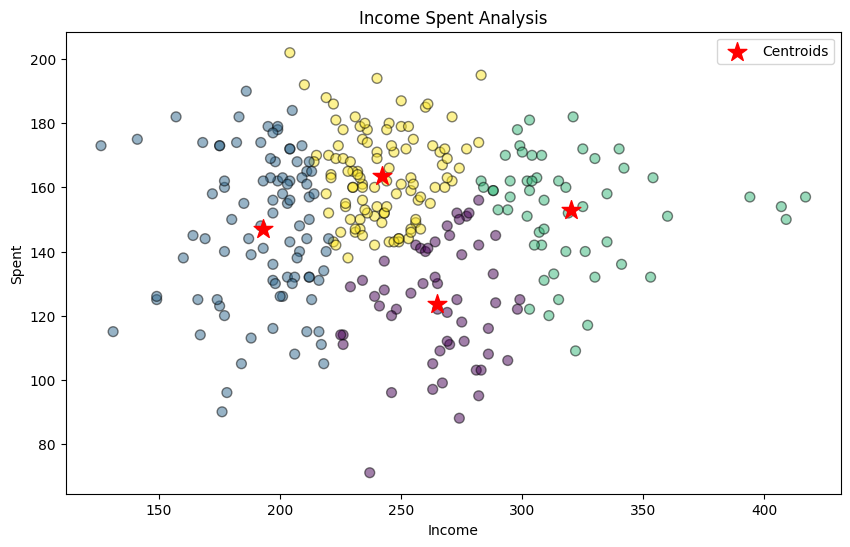

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:,1], c=labels, s=50, alpha=0.5, edgecolors='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='*', label='Centroids')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()

**Cluster Meant according to the data**

In [60]:
income = X.to_numpy()[:, 0]
spend = X.to_numpy()[:, 1]

# Calculate percentiles
income_q1, income_q2, income_q3 = np.percentile(income, [25, 50, 75])
spend_q1, spend_q2, spend_q3 = np.percentile(spend, [25, 50, 75])

def categorize(value, q1, q2, q3):
    if value >= q3:
        return "High"
    elif value <= q1:
        return "Low"
    else:
        return "Medium"

# Label clusters
for i, center in enumerate(model.cluster_centers_):
    income_cat = categorize(center[0], income_q1, income_q2, income_q3)
    spend_cat = categorize(center[1], spend_q1, spend_q2, spend_q3)
    print(f"Cluster {i}: {income_cat} Income, {spend_cat} Spend")

Cluster 0: Medium Income, Low Spend
Cluster 1: Low Income, Medium Spend
Cluster 2: High Income, Medium Spend
Cluster 3: Medium Income, Medium Spend


**Evaluation using Manual Inputs**

In [61]:
new_X = [[193, 132]]
new_labels = model.predict(new_X)
print(new_labels)

[1]


c:\Users\perug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
